INF2178 Midterm Project Group 41

Ashley Wang (#1004114111)

Yasmin Sawan (#1004500505)

Link to colab: https://colab.research.google.com/drive/1xoLrPcD3zVzkhwpTHTU0bgPKuzJAo_dV?usp=sharing


# Dataset Cleaning

In [ ]:
import pandas as pd
import numpy as np

# import data
link = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
dataset = pd.read_csv(link, header=0)
dataset.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

Dataset for the research questions

In [ ]:
ds = dataset[dataset['StripSearch']==1]
StripSearchCount = ds.groupby('PersonID',as_index=False).size()
valid_dataset = ds.drop_duplicates(subset=['PersonID']).sort_values(by='PersonID')

valid_dataset['StripSearchCount'] = StripSearchCount['size'].to_list()

valid_dataset = valid_dataset.drop(columns = ['Arrest_Year', 'Arrest_Month', 'EventID', 
        'ArrestID','ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'])
valid_dataset = valid_dataset.dropna()
valid_dataset = valid_dataset.replace('Youth (aged 17 and younger)','Youth')
valid_dataset = valid_dataset.replace('Youth (aged 17 years and under)','Youth')
valid_dataset.head()

,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,StripSearchCount
55640,300003,White,M,Aged 25 to 34 years,Not a youth,1
50360,300007,South Asian,M,Aged 25 to 34 years,Not a youth,1
22731,300015,Unknown or Legacy,F,Aged 25 to 34 years,Not a youth,1
18361,300036,Black,M,Aged 65 and older,Not a youth,2
52483,300043,White,M,Aged 55 to 64 years,Not a youth,2





# EDA

In [ ]:

# dependent variable
dv = valid_dataset['StripSearchCount']
# Sample size
n = len(dv)
# Mean
x_bar = np.mean(dv)
# Median
x_median = np.median(dv)
# Mode
x_mode = np.average(dv)
# Sample standard deviation
s = np.std(dv, ddof=1)
# Standard error of the mean
sem = s / np.sqrt(n)
# Variance
var = valid_dataset['StripSearchCount'].var()

print(f"""
Sample size = {n}, 
mean = {x_bar:.2f}, 
median = {x_median:.2f},
mode = {x_mode:.2f}, 
sample std deviation = {s:.2f}, 
std error of the mean = {sem:.2f}, 
Variance = {var:.2f}""")


Sample size = 5045, 
mean = 1.55, 
median = 1.00,
mode = 1.55, 
sample std deviation = 1.21, 
std error of the mean = 0.02, 
Variance = 1.47


Mean of distinct Gender groups and Age groups

In [ ]:

f_mean = np.mean(valid_dataset[valid_dataset['Sex']=='F']['StripSearchCount'])
m_mean = np.mean(valid_dataset[valid_dataset['Sex']=='M']['StripSearchCount'])
print(f"""Male mean: {m_mean:.2f}\nFemale mean: {f_mean:.2f}""")

age1_mean = np.mean(valid_dataset[valid_dataset['Age_group__at_arrest_']=='Aged 17 years and under']['StripSearchCount'])
age2_mean = np.mean(valid_dataset[valid_dataset['Age_group__at_arrest_']=='Aged 17 years and younger']['StripSearchCount'])
age3_mean = np.mean(valid_dataset[valid_dataset['Age_group__at_arrest_']=='Aged 18 to 24 years']['StripSearchCount'])
age4_mean = np.mean(valid_dataset[valid_dataset['Age_group__at_arrest_']=='Aged 25 to 34 years']['StripSearchCount'])
age5_mean = np.mean(valid_dataset[valid_dataset['Age_group__at_arrest_']=='Aged 35 to 44 years']['StripSearchCount'])
age6_mean = np.mean(valid_dataset[valid_dataset['Age_group__at_arrest_']=='Aged 45 to 54 years']['StripSearchCount'])
age7_mean = np.mean(valid_dataset[valid_dataset['Age_group__at_arrest_']=='Aged 55 to 64 years']['StripSearchCount'])
age8_mean = np.mean(valid_dataset[valid_dataset['Age_group__at_arrest_']=='Aged 65 years and older']['StripSearchCount'])
age9_mean = np.mean(valid_dataset[valid_dataset['Age_group__at_arrest_']=='Aged 65 and older']['StripSearchCount'])
print(f"""
Mean of Aged 17 years and under: {age1_mean:.2f}
Mean of Aged 17 years and younger: {age2_mean:.2f}
Mean of Aged 18 to 24 years {age3_mean:.2f}
Mean of Aged 25 to 34 years {age4_mean:.2f}
Mean of Aged 35 to 44 years: {age5_mean:.2f}
Mean of Aged 45 to 54 years: {age6_mean:.2f}
Mean of Aged 55 to 64 years: {age7_mean:.2f}
Mean of Aged 65 years and older: {age8_mean:.2f}
Mean of Aged 65 and older: {age9_mean:.2f}
""")

race1_mean = np.mean(valid_dataset[valid_dataset['Perceived_Race']=='White']['StripSearchCount'])
race2_mean = np.mean(valid_dataset[valid_dataset['Perceived_Race']=='Black']['StripSearchCount'])
race3_mean = np.mean(valid_dataset[valid_dataset['Perceived_Race']=='Unknown or Legacy']['StripSearchCount'])
race4_mean = np.mean(valid_dataset[valid_dataset['Perceived_Race']=='East/Southeast Asian']['StripSearchCount'])
race5_mean = np.mean(valid_dataset[valid_dataset['Perceived_Race']=='South Asian']['StripSearchCount'])
race6_mean = np.mean(valid_dataset[valid_dataset['Perceived_Race']=='Middle-Eastern']['StripSearchCount'])
race7_mean = np.mean(valid_dataset[valid_dataset['Perceived_Race']=='Indigenous']['StripSearchCount'])
race8_mean = np.mean(valid_dataset[valid_dataset['Perceived_Race']=='Latino']['StripSearchCount'])
print(f"""
Mean of White race: {race1_mean:.2f}
Mean of Black race: {race2_mean:.2f}
Mean of Unknown or Legacy: {race3_mean:.2f}
Mean of East/Southeast Asian race: {race4_mean:.2f}
Mean of South Asian race: {race5_mean:.2f}
Mean of Middle-Eastern race: {race6_mean:.2f}
Mean of Indigenous race: {race7_mean:.2f}
Mean of Latino race: {race8_mean:.2f}
""")

Male mean: 1.55
Female mean: 1.55

Mean of Aged 17 years and under: 1.00
Mean of Aged 17 years and younger: 1.38
Mean of Aged 18 to 24 years 1.42
Mean of Aged 25 to 34 years 1.64
Mean of Aged 35 to 44 years: 1.63
Mean of Aged 45 to 54 years: 1.46
Mean of Aged 55 to 64 years: 1.45
Mean of Aged 65 years and older: 1.00
Mean of Aged 65 and older: 1.07


Mean of White race: 1.62
Mean of Black race: 1.48
Mean of Unknown or Legacy: 1.52
Mean of East/Southeast Asian race: 1.34
Mean of South Asian race: 1.28
Mean of Middle-Eastern race: 1.46
Mean of Indigenous race: 1.94
Mean of Latino race: 1.48



In [ ]:

from pandas._libs.hashtable import value_count
# frequency of different genders
sex_freq = valid_dataset['Sex'].value_counts()
print(sex_freq)

# frequency of different age groups
age_freq = valid_dataset['Age_group__at_arrest_'].value_counts()
print(age_freq)

# frequency of different racial groups
race_freq = valid_dataset['Perceived_Race'].value_counts()
print(race_freq)


M    4219
F     826
Name: Sex, dtype: int64
Aged 25 to 34 years          1719
Aged 35 to 44 years          1263
Aged 18 to 24 years           953
Aged 45 to 54 years           612
Aged 55 to 64 years           252
Aged 17 years and younger     205
Aged 65 and older              30
Aged 17 years and under         8
Aged 65 years and older         3
Name: Age_group__at_arrest_, dtype: int64
White                   2200
Black                   1633
Unknown or Legacy        369
East/Southeast Asian     247
South Asian              192
Middle-Eastern           163
Indigenous               151
Latino                    90
Name: Perceived_Race, dtype: int64


In [ ]:
import plotly.express as px

fig = px.histogram(valid_dataset, x="Age_group__at_arrest_", y="StripSearchCount",
             color='Perceived_Race', barmode='group',
             height=800)
fig.show()

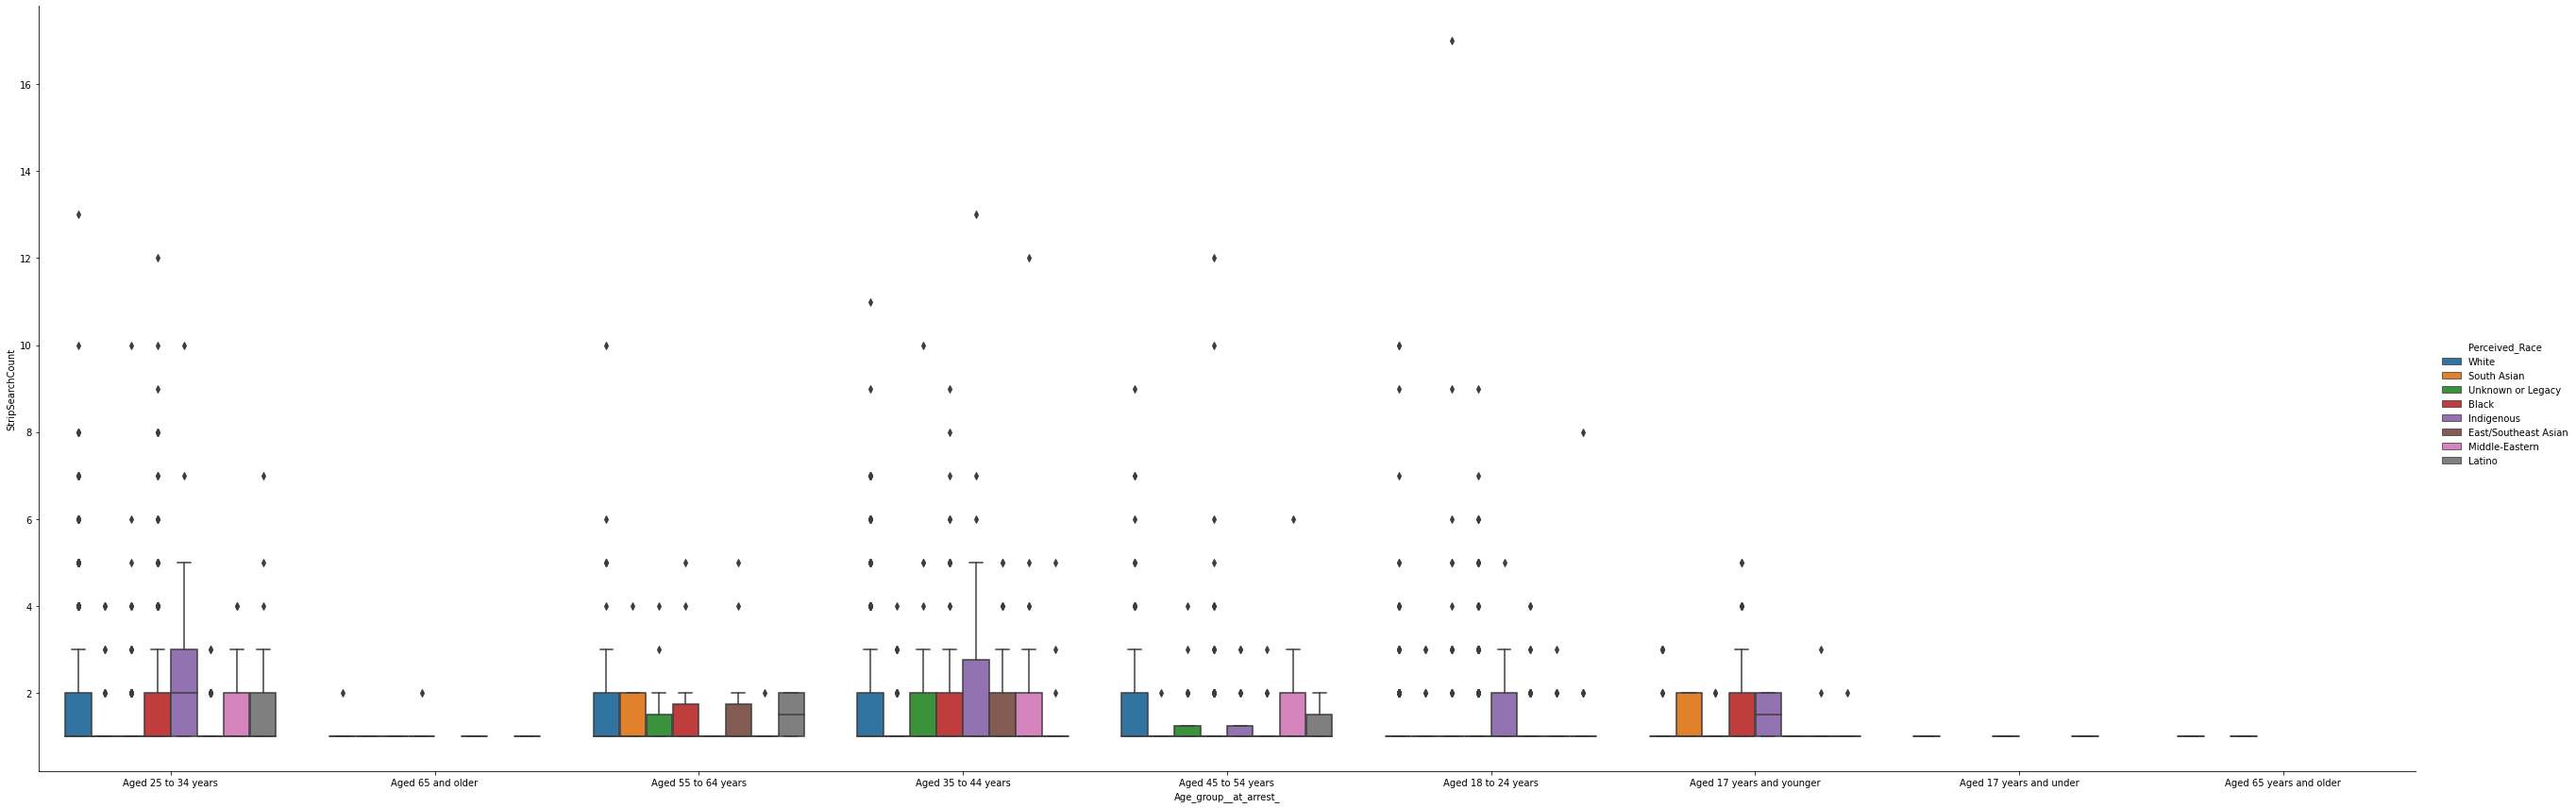

In [ ]:
import seaborn as sns
sns.catplot(data=valid_dataset, kind="box", x="Age_group__at_arrest_", y="StripSearchCount", hue="Perceived_Race", height = 12, aspect=3)

In [ ]:

fig = px.histogram(valid_dataset, x="Perceived_Race", y="StripSearchCount",
             color='Sex', barmode='group',
             height=800)
fig.show()

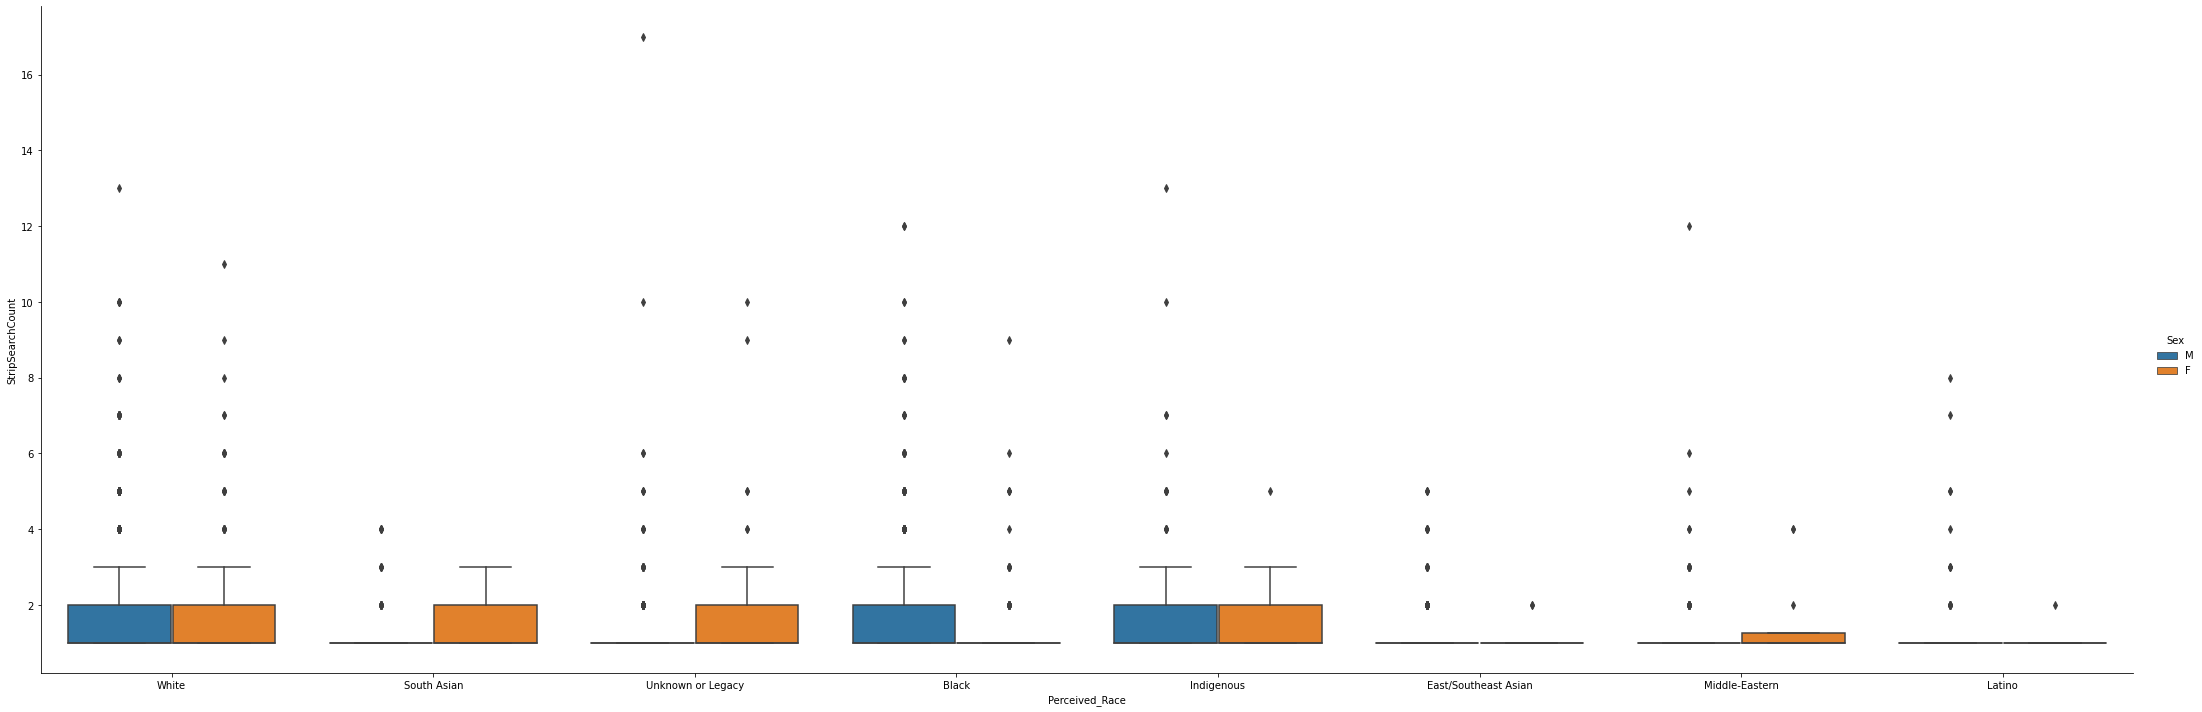

In [ ]:
import seaborn as sns
sns.catplot(data=valid_dataset, kind="box", x="Perceived_Race", y="StripSearchCount", hue="Sex", height = 10, aspect=3)

# T-Test


In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import researchpy as rp

summary, results = rp.ttest(group1= valid_dataset['StripSearchCount'][valid_dataset['Sex'] == 'M'], group1_name= "Male",
                            group2= valid_dataset['StripSearchCount'][valid_dataset['Sex'] == 'F'], group2_name= "Female")
print(summary)
print(results)

# Import stats packages for ttest
import scipy.stats as stats

# Seperate the gender groups for ttest 
male_group = valid_dataset['StripSearchCount'][valid_dataset['Sex'] == 'M']
female_group = valid_dataset['StripSearchCount'][valid_dataset['Sex'] == 'F']

# t-test
ttest_statistic, ttest_pvalue = stats.ttest_ind(male_group, female_group)

print(f'T-Test: s = {ttest_statistic}, p = {ttest_pvalue}')



   Variable       N      Mean        SD        SE  95% Conf.  Interval
0      Male  4219.0  1.545864  1.219398  0.018773   1.509058  1.582670
1    Female   826.0  1.547215  1.178936  0.041020   1.466699  1.627732
2  combined  5045.0  1.546085  1.212751  0.017074   1.512612  1.579558
              Independent t-test    results
0  Difference (Male - Female) =     -0.0014
1          Degrees of freedom =   5043.0000
2                           t =     -0.0293
3       Two side test p value =      0.9766
4      Difference < 0 p value =      0.4883
5      Difference > 0 p value =      0.5117
6                   Cohen's d =     -0.0011
7                   Hedge's g =     -0.0011
8              Glass's delta1 =     -0.0011
9            Point-Biserial r =     -0.0004
T-Test: s = -0.029287410614964135, p = 0.976636526374361


# ANOVA test

In [ ]:

# List of age groups
np.unique(valid_dataset['Age_group__at_arrest_'])

array(['Aged 17 years and under', 'Aged 17 years and younger',
       'Aged 18 to 24 years', 'Aged 25 to 34 years',
       'Aged 35 to 44 years', 'Aged 45 to 54 years',
       'Aged 55 to 64 years', 'Aged 65 and older',
       'Aged 65 years and older'], dtype=object)



ANOVA test

In [ ]:


# Samples
object1 = valid_dataset[valid_dataset['Age_group__at_arrest_'] == 'Aged 17 years and under']['StripSearchCount']
object2 = valid_dataset[valid_dataset['Age_group__at_arrest_'] == 'Aged 17 years and younger']['StripSearchCount']
object3 = valid_dataset[valid_dataset['Age_group__at_arrest_'] == 'Aged 18 to 24 years']['StripSearchCount']
object4 = valid_dataset[valid_dataset['Age_group__at_arrest_'] == 'Aged 25 to 34 years']['StripSearchCount']
object5 = valid_dataset[valid_dataset['Age_group__at_arrest_'] == 'Aged 35 to 44 years']['StripSearchCount']
object6 = valid_dataset[valid_dataset['Age_group__at_arrest_'] == 'Aged 45 to 54 years']['StripSearchCount']
object7 = valid_dataset[valid_dataset['Age_group__at_arrest_'] == 'Aged 55 to 64 years']['StripSearchCount']
object8 = valid_dataset[valid_dataset['Age_group__at_arrest_'] == 'Aged 65 and older']['StripSearchCount']
object9 = valid_dataset[valid_dataset['Age_group__at_arrest_'] == 'Aged 65 years and older']['StripSearchCount']


# Importing library
from scipy.stats import f_oneway

# One-way ANOVA test
statistic, pvalue = f_oneway(object1, object2, object3, object4, object5, object6, object7, object8, object9)

# Function to determine the significant level
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'

# Outputs
p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')
print(f'The p-value is {p_rounded} ({significance})')


One-way ANOVA: s = 5.157188532534166, p = 1.9848382704819577e-06
The p-value is <0.001 (***)


In [ ]:
race1 = valid_dataset[valid_dataset['Perceived_Race']=='White']['StripSearchCount']
race2 = valid_dataset[valid_dataset['Perceived_Race']=='Black']['StripSearchCount']
race3 = valid_dataset[valid_dataset['Perceived_Race']=='Unknown or Legacy']['StripSearchCount']
race4 = valid_dataset[valid_dataset['Perceived_Race']=='East/Southeast Asian']['StripSearchCount']
race5 = valid_dataset[valid_dataset['Perceived_Race']=='South Asian']['StripSearchCount']
race6 = valid_dataset[valid_dataset['Perceived_Race']=='Middle-Eastern']['StripSearchCount']
race7 = valid_dataset[valid_dataset['Perceived_Race']=='Indigenous']['StripSearchCount']
race8 = valid_dataset[valid_dataset['Perceived_Race']=='Latino']['StripSearchCount']


# Importing library
from scipy.stats import f_oneway

# One-way ANOVA test
statistic, pvalue = f_oneway(race1, race2, race3, race4, race5, race6, race7, race8)
# Outputs
p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')
print(f'The p-value is {p_rounded} ({significance})')


One-way ANOVA: s = 6.725836158071073, p = 5.8767417366725346e-08
The p-value is <0.001 (***)


In [ ]:

pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Post-hocs test

,Aged 17 years and under,Aged 17 years and younger,Aged 18 to 24 years,Aged 25 to 34 years,Aged 35 to 44 years,Aged 45 to 54 years,Aged 55 to 64 years,Aged 65 and older,Aged 65 years and older
Aged 17 years and under,1.000000,0.147253,1.653090e-01,5.077306e-02,0.048667,0.108585,0.118462,0.746264,1.000000
Aged 17 years and younger,0.147253,1.000000,6.993916e-01,2.144109e-02,0.018770,0.546090,0.683178,0.044095,0.369092
Aged 18 to 24 years,0.165309,0.699392,1.000000e+00,7.831454e-07,0.000001,0.129996,0.336264,0.049758,0.394271
Aged 25 to 34 years,0.050773,0.021441,7.831454e-07,1.000000e+00,0.850140,0.009999,0.051078,0.002221,0.230886
Aged 35 to 44 years,0.048667,0.018770,1.490307e-06,8.501404e-01,1.000000,0.009216,0.044564,0.002019,0.226350
Aged 45 to 54 years,0.108585,0.546090,1.299964e-01,9.998936e-03,0.009216,1.000000,0.890282,0.018042,0.323805
Aged 55 to 64 years,0.118462,0.683178,3.362639e-01,5.107832e-02,0.044564,0.890282,1.000000,0.025339,0.334308
Aged 65 and older,0.746264,0.044095,4.975795e-02,2.220612e-03,0.002019,0.018042,0.025339,1.000000,0.831618
Aged 65 years and older,1.000000,0.369092,3.942713e-01,2.308855e-01,0.226350,0.323805,0.334308,0.831618,1.000000


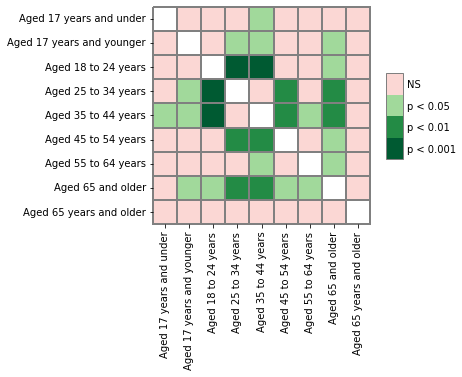

In [ ]:

import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Post hocs test
posthocs_age = sp.posthoc_conover(valid_dataset, val_col='StripSearchCount', group_col='Age_group__at_arrest_')

# Heatmap for post-hocs test
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(posthocs_age, **heatmap_args)
posthocs_age

,Black,East/Southeast Asian,Indigenous,Latino,Middle-Eastern,South Asian,Unknown or Legacy,White
Black,1.000000,0.212837,4.017870e-05,0.483511,0.597168,1.384990e-02,0.914318,0.000064
East/Southeast Asian,0.212837,1.000000,2.624649e-05,0.940486,0.679821,2.854980e-01,0.337476,0.001314
Indigenous,0.000040,0.000026,1.000000e+00,0.001407,0.000507,8.023942e-07,0.000233,0.009280
Latino,0.483511,0.940486,1.407062e-03,1.000000,0.804799,3.808289e-01,0.553474,0.054864
Middle-Eastern,0.597168,0.679821,5.065440e-04,0.804799,1.000000,1.751581e-01,0.692373,0.032052
South Asian,0.013850,0.285498,8.023942e-07,0.380829,0.175158,1.000000e+00,0.041288,0.000024
Unknown or Legacy,0.914318,0.337476,2.328996e-04,0.553474,0.692373,4.128771e-02,1.000000,0.015015
White,0.000064,0.001314,9.280403e-03,0.054864,0.032052,2.354087e-05,0.015015,1.000000


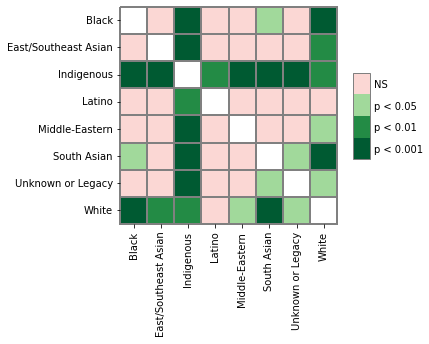

In [ ]:
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Post hocs test
posthocs_race = sp.posthoc_conover(valid_dataset, val_col='StripSearchCount', group_col='Perceived_Race')

# Heatmap for post-hocs test for StripSearchCount & Perceived_Race
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(posthocs_race, **heatmap_args)
posthocs_race

Tukey HSD

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform Tukey's test
tukey_age = pairwise_tukeyhsd(endog=valid_dataset['StripSearchCount'],
                          groups=valid_dataset['Age_group__at_arrest_'],
                          alpha=0.05)

#display results
print(tukey_age)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                    group2          meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------
  Aged 17 years and under Aged 17 years and younger   0.3805    0.9 -0.9713  1.7323  False
  Aged 17 years and under       Aged 18 to 24 years   0.4187    0.9  -0.913  1.7504  False
  Aged 17 years and under       Aged 25 to 34 years   0.6358 0.8498 -0.6934  1.9651  False
  Aged 17 years and under       Aged 35 to 44 years   0.6255 0.8652 -0.7049  1.9558  False
  Aged 17 years and under       Aged 45 to 54 years   0.4575    0.9 -0.8773  1.7923  False
  Aged 17 years and under       Aged 55 to 64 years   0.4484    0.9 -0.8986  1.7955  False
  Aged 17 years and under         Aged 65 and older   0.0667    0.9 -1.4259  1.5592  False
  Aged 17 years and under   Aged 65 years and older      0.0    0.9 -2.5394  2.5394  False

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform Tukey's test
tukey_race = pairwise_tukeyhsd(endog=valid_dataset['StripSearchCount'],
                          groups=valid_dataset['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey_race)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.1409 0.6582 -0.3909  0.1092  False
               Black           Indigenous   0.4554  0.001  0.1439  0.7669   True
               Black               Latino  -0.0072    0.9 -0.4038  0.3894  False
               Black       Middle-Eastern  -0.0249    0.9 -0.3257   0.276  False
               Black          South Asian   -0.209  0.312 -0.4884  0.0705  False
               Black    Unknown or Legacy    0.038    0.9 -0.1731  0.2492  False
               Black                White   0.1386 0.0105   0.019  0.2583   True
East/Southeast Asian           Indigenous   0.5963  0.001  0.2179  0.9746   True
East/Southeast Asian               Latino   0.1336    0.9 -0.3173  0.5846  False
East/Southeast Asian       M

# Two-way ANOVA & Interaction Plots

In [ ]:

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('StripSearchCount ~ C(Sex) + C(Age_group__at_arrest_) + C(Sex):C(Age_group__at_arrest_)', data=valid_dataset).fit()
sex_age_anova = sm.stats.anova_lm(model, typ=2)
sex_age_anova

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7



,sum_sq,df,F,PR(>F)
C(Sex),0.076454,1.0,0.052327,8.190716e-01
C(Age_group__at_arrest_),68.980332,8.0,5.901528,7.535154e-07
C(Sex):C(Age_group__at_arrest_),11.918990,8.0,1.019715,4.183851e-01
Residual,7346.257141,5028.0,NaN,NaN


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('StripSearchCount ~ C(Sex) + C(Perceived_Race) + C(Sex):C(Perceived_Race)', data=valid_dataset).fit()
sex_race_anova = sm.stats.anova_lm(model, typ=2)
sex_race_anova

,sum_sq,df,F,PR(>F)
C(Sex),1.205379,1.0,0.827431,3.630601e-01
C(Perceived_Race),69.903057,7.0,6.854982,3.929195e-08
C(Sex):C(Perceived_Race),22.520523,7.0,2.208455,3.072039e-02
Residual,7326.110342,5029.0,NaN,NaN


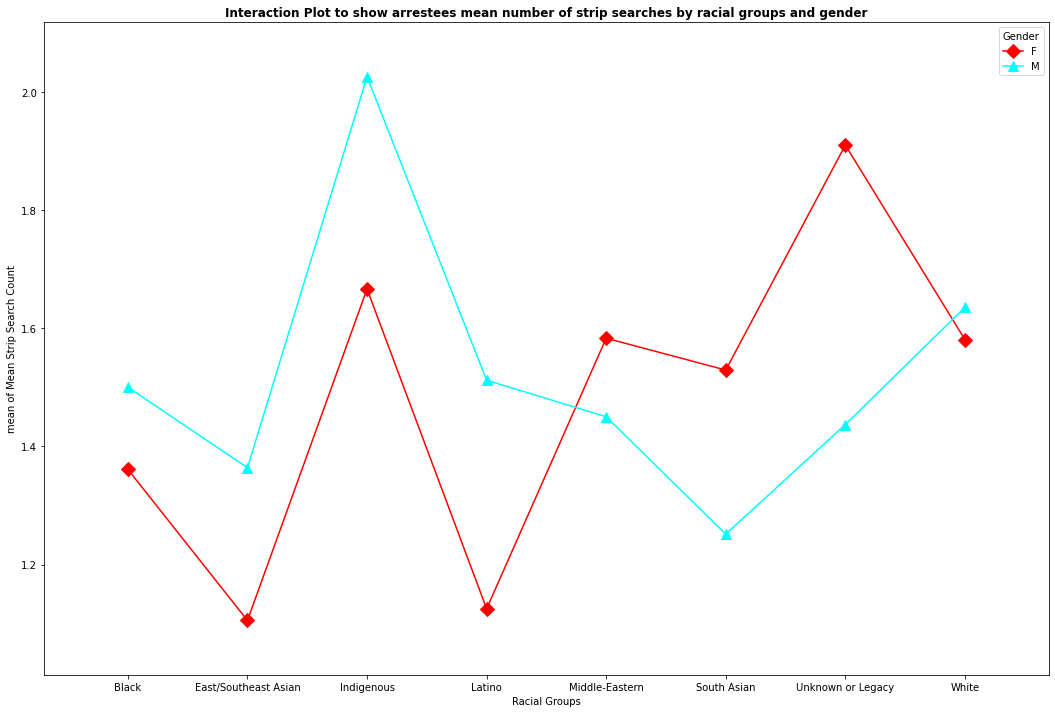

In [ ]:

from matplotlib import figure
from statsmodels.graphics.factorplots import interaction_plot

gender = valid_dataset['Sex'].astype("category")
StripSearch = valid_dataset['StripSearchCount'].values
race = valid_dataset['Perceived_Race'].values

fig, ax = plt.subplots(figsize = (18,12))
fig = interaction_plot(race,gender, StripSearch, markers=['D','^'], ms=10, ax=ax, xlabel = 'Racial Groups', ylabel = 'Mean Strip Search Count', legendtitle = 'Gender')
#x axis(racial groups), trace (gender of arrestees), dependent variable (mean strip search counts)

plt.title('Interaction Plot to show arrestees mean number of strip searches by racial groups and gender', fontweight='bold')
plt.show()


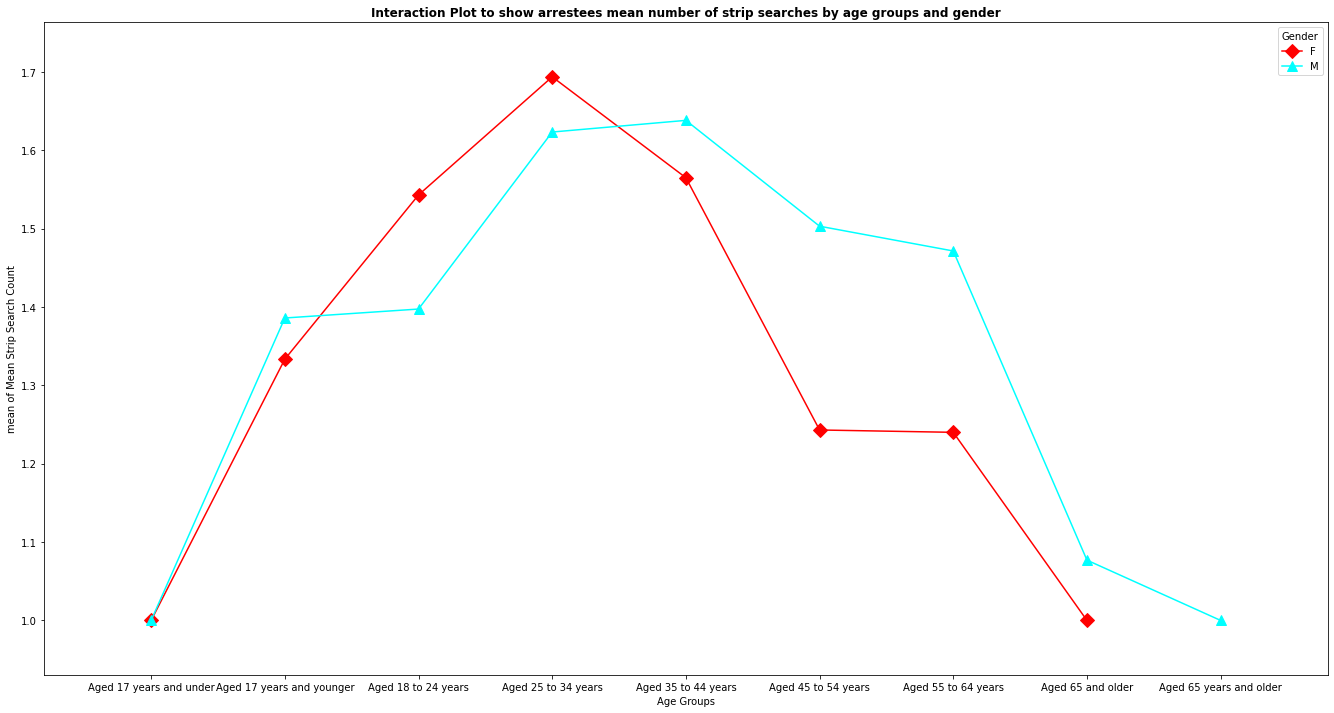

In [ ]:
from matplotlib import figure
from statsmodels.graphics.factorplots import interaction_plot

gender = valid_dataset['Sex'].astype("category")
age = valid_dataset['Age_group__at_arrest_'].values
StripSearch = valid_dataset['StripSearchCount'].values

fig, ax = plt.subplots(figsize = (23,12))
fig = interaction_plot(age,gender, StripSearch, markers=['D','^'], ms=10, ax=ax, xlabel = 'Age Groups', ylabel = 'Mean Strip Search Count', legendtitle = 'Gender')
#x axis(racial groups), trace (gender of arrestees), dependent variable (mean strip search counts)

plt.title('Interaction Plot to show arrestees mean number of strip searches by age groups and gender', fontweight='bold')
plt.show()